# CSE4510 Activity 1
Grant Butler | Pandas EDA

In [1]:
import pandas as pd

### Question 1:
##### a. Loading the dataset using pandas

In [2]:
# 1a.
brooklyn = pd.read_csv("data/rollingsales_brooklyn.csv", skiprows = 4) 
# first four rows of data had info that was messing up the information

##### b. Display shape of data

In [3]:
# 1b.
brooklyn.shape

(23373, 21)

##### c. Display the first 2 rows

In [4]:
# 1c.
brooklyn.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$403,572",7/9/13
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$218,010",7/12/13


##### d. Display row 14

In [5]:
# 1d. 
brooklyn.iloc[14]

BOROUGH                                                                      3
NEIGHBORHOOD                                         BATH BEACH               
BUILDING CLASS CATEGORY                                                       
TAX CLASS AT PRESENT                                                         4
BLOCK                                                                     6370
LOT                                                                       1321
EASE-MENT                                                                     
BUILDING CLASS AT PRESENT                                                   RP
ADDRESS                             98 BAY 20TH   STREET                      
APART\nMENT\nNUMBER                                               P1          
ZIP CODE                                                                 11214
RESIDENTIAL UNITS                                                            0
COMMERCIAL UNITS                                    

- - -

### Question 2:
##### a. Converting column names to lower case

In [6]:
brooklyn.columns = [x.lower() for x in brooklyn.columns.tolist()]

##### b. Replace the '\n' in the column names with space

In [7]:
brooklyn.columns = [x.replace('\n', ' ') for x in brooklyn.columns.tolist()]

##### c. Replace the spaces in the names with underscores

In [8]:
brooklyn.columns = [x.replace(' ', '_') for x in brooklyn.columns.tolist()]

##### d. Display row 14 again to see the changes

In [9]:
brooklyn.iloc[14]

borough                                                                      3
neighborhood                                         BATH BEACH               
building_class_category                                                       
tax_class_at_present                                                         4
block                                                                     6370
lot                                                                       1321
ease-ment                                                                     
building_class_at_present                                                   RP
address                             98 BAY 20TH   STREET                      
apart_ment_number                                                 P1          
zip_code                                                                 11214
residential_units                                                            0
commercial_units                                    

- - -

### Question 3:
##### Convert field `sale_price` to numeric.

In [10]:
import re

# remove_things = [x.replace('$', '') for x in brooklyn['sale_price'].tolist()]
# final = [x.replace(',', '') for x in remove_things]

# easier with regular expression crutch ( ಡ益ಡ)
# brooklyn['sale_price']

brooklyn['sale_price'] = [re.sub('[^0-9]', '', x) for x in brooklyn['sale_price']]

              
brooklyn['sale_price'] = brooklyn['sale_price'].astype('int') # changing the actual data type

Quick Question:

I am a bit confused why this didn't work to convert the column.

```py
pd.to_numeric(brooklyn['sale_price'])
```

When I tried to use this and then tried to do question 4, I would keep getting an error that said the comparison was between a str and an int, despite me double checking that the dtype was definitely int64. I'm not sure why that is, since there were no errors when using the `to_numeric` function since all of the fields were numbers. Do you have any insight as to why?
- - -

### Quesiton 4:
##### Display count of missing sale prices

In [11]:
# getting constraint of the rows that are zero in field 'sale_price'
missing_sale = brooklyn['sale_price']<1

# getting the count and printing it
count = brooklyn[missing_sale].value_counts().sum() 

print(count)

8791


- - -

### Question 5:
##### Convert `land_square_feet` to numeric

In [12]:
# removing anything that is not a number
brooklyn['land_square_feet'] = [re.sub('[^0-9]', '', x) for x in brooklyn['land_square_feet']]

# converting to integers
brooklyn['land_square_feet'] = brooklyn['land_square_feet'].astype('int')

- - -

### Question 6:
##### Converting `gross_square_feet` to numeric

In [13]:
brooklyn['gross_square_feet'] = [re.sub('[^0-9]', '', x) for x in brooklyn['gross_square_feet']]
brooklyn['gross_square_feet'] = brooklyn['gross_square_feet'].astype('int')

##### Converting `sale_date` to datetime

In [14]:
pd.to_datetime(brooklyn['sale_date'])

0       2013-07-09
1       2013-07-12
2       2013-04-25
3       2013-04-25
4       2013-04-25
           ...    
23368   2013-01-17
23369   2013-01-17
23370   2012-12-28
23371   2013-04-17
23372   2012-12-14
Name: sale_date, Length: 23373, dtype: datetime64[ns]

##### Converting `year_built` to numeric

In [15]:
brooklyn['year_built'] = brooklyn['year_built'].astype('int32')

##### Converting `zip_code` to string

In [16]:
brooklyn['zip_code'] = brooklyn['zip_code'].astype('str')

##### Displaying dtypes

In [17]:
brooklyn.dtypes

borough                            int64
neighborhood                      object
building_class_category           object
tax_class_at_present              object
block                              int64
lot                                int64
ease-ment                         object
building_class_at_present         object
address                           object
apart_ment_number                 object
zip_code                          object
residential_units                  int64
commercial_units                   int64
total_units                        int64
land_square_feet                   int64
gross_square_feet                  int64
year_built                         int32
tax_class_at_time_of_sale          int64
building_class_at_time_of_sale    object
sale_price                         int64
sale_date                         object
dtype: object

- - -

### Question 7:
##### Changing `EAST/WEST` to `E/W` for each address

In [18]:
brooklyn['address'] = [x.replace('EAST', 'E') for x in brooklyn['address']]
brooklyn['address'] = [x.replace('WEST', 'W') for x in brooklyn['address']]

- - -

### Question 8:
##### Changing `STREET/AVENUE` to `ST/AVE` in each address

In [19]:
brooklyn['address'] = [x.replace('STREET', 'ST') for x in brooklyn['address']]
brooklyn['address'] = [x.replace('AVENUE', 'AVE') for x in brooklyn['address']]

- - -

### Question 9:
#### Plotting histograms

##### sale price by counts

In [20]:
from matplotlib import pyplot as plt

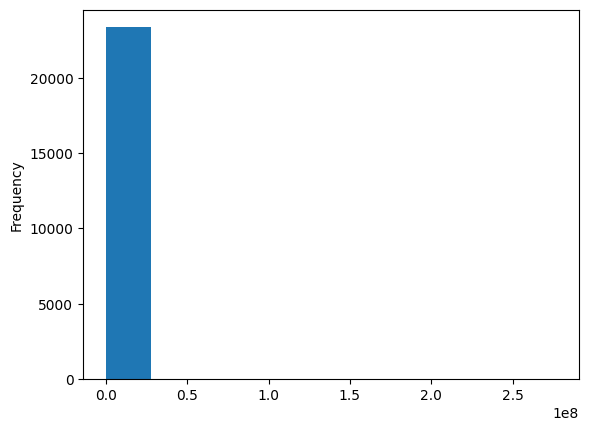

In [21]:
brooklyn['sale_price'].plot.hist(legend=False);

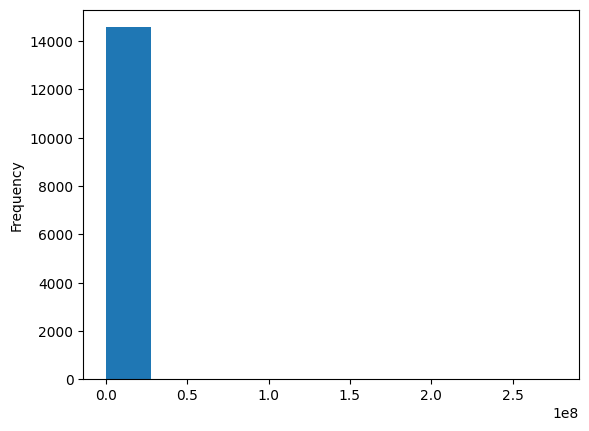

In [22]:
brooklyn[brooklyn['sale_price'] > 0].plot.hist(legend=False);

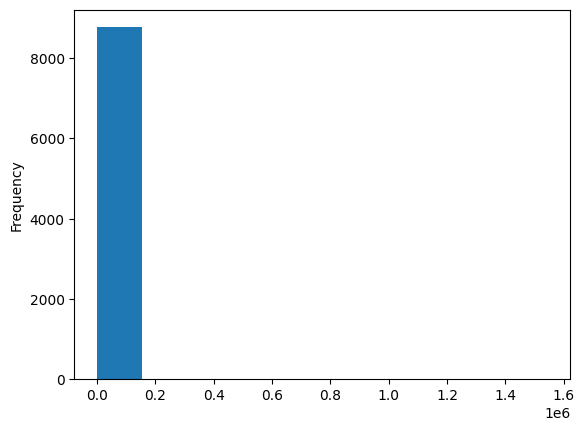

In [23]:
no_price = brooklyn[brooklyn['sale_price'] == 0]

no_price['gross_square_feet'].plot.hist(legend=False);

- - -

### Question 10:
##### Filtering data by family homes

In [24]:
only_family = brooklyn.loc[brooklyn['building_class_category'].str.contains('FAMILY')]
only_family

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
25,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,23,,A9,8641 16TH AVE,,...,1,0,1,2058,1492,1930,1,A9,560000,6/6/13
26,3,BATH BEACH,01 ONE FAMILY HOMES,1,6366,69,,A1,8658 BAY 16TH ST,,...,1,0,1,4833,1724,1930,1,A1,860000,12/18/12
27,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,21,,A9,73 BAY 20TH ST,,...,1,0,1,2417,2132,1930,1,A9,508000,8/24/12
28,3,BATH BEACH,01 ONE FAMILY HOMES,1,6378,64,,A1,56 BAY 28TH ST,,...,1,0,1,3867,1704,1899,1,A1,600000,6/18/13
29,3,BATH BEACH,01 ONE FAMILY HOMES,1,6379,42,,S1,2142 86TH ST,,...,1,1,2,1600,2640,1925,1,S1,0,12/14/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23292,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3311,15,,C0,382 BLEECKER ST,,...,3,0,3,2000,2880,1931,1,C0,100000,10/2/12
23293,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3319,42,,C0,377 GROVE ST,,...,3,0,3,2000,4000,1931,1,C0,0,12/7/12
23294,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3320,37,,C0,427 GROVE ST,,...,3,0,3,2000,4194,1920,1,C0,0,2/4/13
23295,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3371,14,,C0,1384 MADISON ST,,...,3,0,3,2000,4400,1910,1,C0,600000,6/10/13


### Question 11:
##### Create a log scatter plot of `gross_sqft` vs `sale_price`

/home/gronk-droid/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


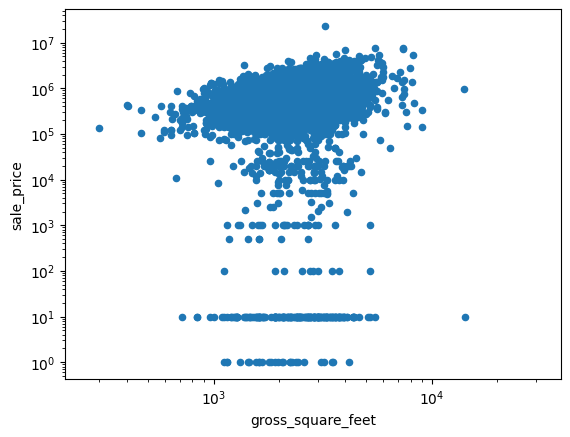

In [25]:
# gross_square_feet vs sale
only_family.plot.scatter(x='gross_square_feet', y='sale_price', loglog=True);

- - -

### Question 12:
##### Getting subset of family homes where `sale_price` < $100,000

In [26]:
under_one_k = only_family['sale_price']<100000
only_family[under_one_k]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
29,3,BATH BEACH,01 ONE FAMILY HOMES,1,6379,42,,S1,2142 86TH ST,,...,1,1,2,1600,2640,1925,1,S1,0,12/14/12
35,3,BATH BEACH,01 ONE FAMILY HOMES,1,6426,10,,A2,239 BAY 8TH ST,,...,1,0,1,5810,2835,1950,1,A2,0,9/27/12
37,3,BATH BEACH,01 ONE FAMILY HOMES,1,6428,65,,A9,228 BAY 11TH ST,,...,1,0,1,1990,1328,1925,1,A9,0,9/25/12
39,3,BATH BEACH,01 ONE FAMILY HOMES,1,6444,11,,A5,211 BAY 26TH ST,,...,1,0,1,2223,2070,1955,1,A5,0,10/22/12
40,3,BATH BEACH,01 ONE FAMILY HOMES,1,6460,35,,A1,8863 15TH AVE,,...,1,0,1,5800,4071,1925,1,A1,0,11/29/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23288,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3301,24,,C0,1450 GREENE AVE,,...,3,0,3,2000,3060,1899,1,C0,0,5/21/13
23291,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3310,3,,C0,275 IRVING AVE,,...,3,0,3,1800,3300,1931,1,C0,0,12/18/12
23293,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3319,42,,C0,377 GROVE ST,,...,3,0,3,2000,4000,1931,1,C0,0,12/7/12
23294,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3320,37,,C0,427 GROVE ST,,...,3,0,3,2000,4194,1920,1,C0,0,2/4/13


##### Number of family homes under $100,000

In [27]:
only_family[under_one_k].value_counts().sum()

4745

- - -

### Question 13:
##### Count of sale prices

In [28]:
only_family['sale_price'].value_counts().sum()

10921

- - -

### Question 14:
##### Remove outliers with sale price <= 5

In [29]:
outlier_rem = only_family[under_one_k]
outlier_rem = outlier_rem[outlier_rem['sale_price']>5]

- - -

### Question 15:
##### New plot of `gross_square_feet` vs `sale_price`

/home/gronk-droid/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


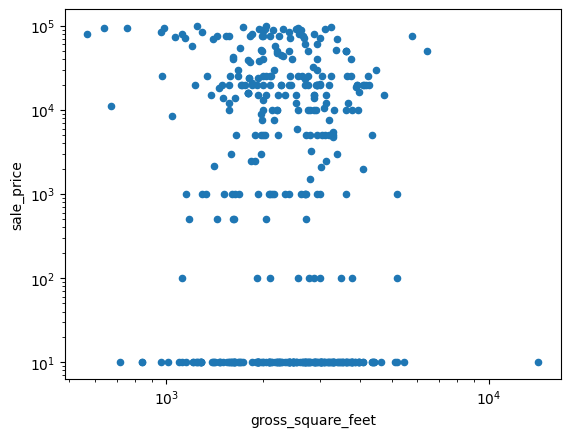

In [30]:
outlier_rem.plot.scatter(x='gross_square_feet', y='sale_price', loglog=True);

### Question 16:
##### Plot top 10 home sales for family homes.

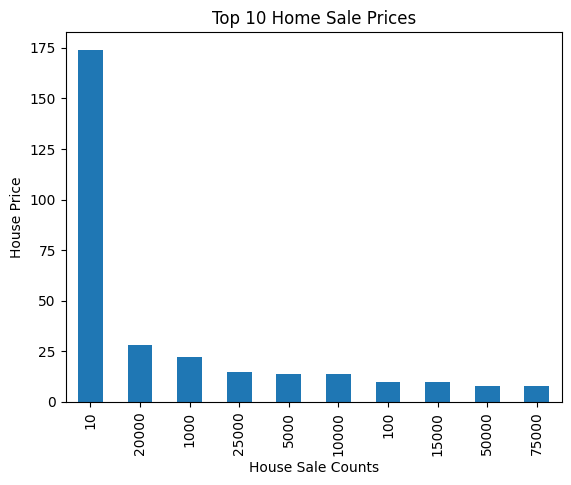

In [31]:
# sort the prices
outlier_rem.sort_values(by=['sale_price'], inplace=True)

top_ten_prices = outlier_rem['sale_price'].value_counts()[0:10]
top_ten_prices
top_ten_prices.plot.bar(title='Top 10 Home Sale Prices', xlabel='House Sale Counts', ylabel='House Price');

I would love to go over this last section. It was kind of hard for me to follow and understand what a lot of the questions were asking me to do. I definitely messed up with the data somewhere here and i don't understand how to fix it. 

Thanks for your time and energy,

Grant